# WEATHER DATA ANALYSIS

### Name : ANJANA VIJAYAN

### Organization : Entri Elevate

### Date : 24/06/2024

# Overview of Problem Statement:

### Developing strong weather forecasting models is important for helping people make smart decisions in many areas, like planning and managing risks. Accurate weather predictions are crucial for being prepared and making good choices in different fields

# Objective: 

### To develop a reliable weather prediction model using advanced machine learning techniques.

## Target Variable:

### Rainfall for year

## Data Description:
### Source: Kaggle

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")


# LOADING DATA

In [3]:
#Load the dataset

wf = pd.read_csv("climate_data.csv")

wf

Date  Average temperature (°F)  Average humidity (%)  \
0     2009-01-01                      37.8                  35.0   
1     2009-01-02                      43.2                  32.0   
2     2009-01-03                      25.7                  60.0   
3     2009-01-04                       9.3                  67.0   
4     2009-01-05                      23.5                  30.0   
...          ...                       ...                   ...   
3897  2020-07-24                      64.1                  62.0   
3898  2020-07-25                      62.8                  60.0   
3899  2020-07-26                      60.6                  68.0   
3900  2020-07-27                      61.7                  64.0   
3901  2020-07-28                      60.5                  61.0   

      Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                      12.7                    29.7                     26.4   
1                      14.7                    29.5                     12.8   
2                      12.7                    29.7                      8.3   
3                       0.1                    30.4                      2.9   
4                      -5.3                    29.9                     16.7   
...                     ...                     ...                      ...   
3897                   49.8                    29.6                      3.6   
3898                   48.1                    29.7                      2.5   
3899                   48.9                    29.8                      1.7   
3900                   47.4                    29.9                      2.2   
3901                   45.3                    29.7                      4.0   

      Average gustspeed (mph)  Average direction (°deg)  \
0                        36.8                     274.0   
1                        18.0                     240.0   
2                        12.2                     290.0   
3                         4.5                      47.0   
4                        23.1                     265.0   
...                       ...                       ...   
3897                      5.8                     240.0   
3898                      4.0                     242.0   
3899                      2.9                     357.0   
3900                      4.0                      66.0   
3901                      6.2                     248.0   

      Rainfall for month (in)  Rainfall for year (in)  ...  \
0                        0.00                    0.00  ...   
1                        0.00                    0.00  ...   
2                        0.00                    0.00  ...   
3                        0.00                    0.00  ...   
4                        0.00                    0.00  ...   
...                       ...                     ...  ...   
3897                     0.24                    4.38  ...   
3898                     0.33                    4.47  ...   
3899                     0.33                    4.47  ...   
3900                     0.33                    4.47  ...   
3901                     0.35                    4.49  ...   

      Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
0                      4.0                  27.0            29.762   
1                      4.0                  16.0            29.669   
2                      8.0                  35.0            30.232   
3                      7.0                  35.0            30.566   
4                      5.0                  13.0            30.233   
...                    ...                   ...               ...   
3897                  86.0                  35.0            29.686   
3898                  90.0                  36.0            29.781   
3899                  90.0                  40.0            29.930   
3900                  96.0                  35.0            29.941   
3901      

In [4]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
 7   Average direction (°deg)  3902 non-null   float64
 8   Rainfall for month (in)   3902 non-null   float64
 9   Rainfall for year (in)    3902 non-null   float64
 10  Maximum rain per minute   3902 non-null   float64
 11  Maximum temperature (°F)  3902 non-null   float64
 12  Minimum temperature (°F)  3902 non-null   float64
 13  Maximum humidity (%)      3902 non-null   float64
 14  Minimum 

In [5]:
# Check for null values in each column

wf.isnull().sum()

Date                        0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
Date1                       0
Month                       0
diff_pressure               0
dtype: int64

# DATA PREPROCESSING - DATA CLEANING

### Check if the Date fields are the same same

In [6]:
print(wf.loc[wf["Date"] != wf["Date1"], ["Date", "Date1"]])

Empty DataFrame
Columns: [Date, Date1]
Index: []


### The Date fields are the exact same, so Date1 should be removed.

In [7]:
wf.drop(['Date1'], axis=1, inplace=True)

In [8]:
# Drop null column
wf.drop(['Maximum rain per minute'], axis=1, inplace=True)

In [9]:

numeric_columns = [
    'Average temperature (°F)', 'Average humidity (%)', 'Average dewpoint (°F)',
    'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)',
    'Average direction (°deg)', 'Rainfall for month (in)', 'Rainfall for year (in)',
    'Maximum temperature (°F)', 'Minimum temperature (°F)', 'Maximum humidity (%)',
    'Minimum humidity (%)', 'Maximum pressure', 'Minimum pressure',
    'Maximum windspeed (mph)', 'Maximum gust speed (mph)', 'Maximum heat index (°F)',
    'Month', 'diff_pressure'
]

# Computing Z-score for selected numeric columns
z_scores = (wf[numeric_columns] - wf[numeric_columns].mean()) / wf[numeric_columns].std()

threshold = 3

# Finding outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

print("Outliers:")
print(outliers.sum())

Outliers:
Average temperature (°F)      8
Average humidity (%)          0
Average dewpoint (°F)         2
Average barometer (in)       21
Average windspeed (mph)      37
Average gustspeed (mph)      40
Average direction (°deg)      0
Rainfall for month (in)      83
Rainfall for year (in)        0
Maximum temperature (°F)      4
Minimum temperature (°F)     26
Maximum humidity (%)         87
Minimum humidity (%)         83
Maximum pressure             28
Minimum pressure             11
Maximum windspeed (mph)      24
Maximum gust speed (mph)    109
Maximum heat index (°F)       4
Month                         0
diff_pressure                11
dtype: int64


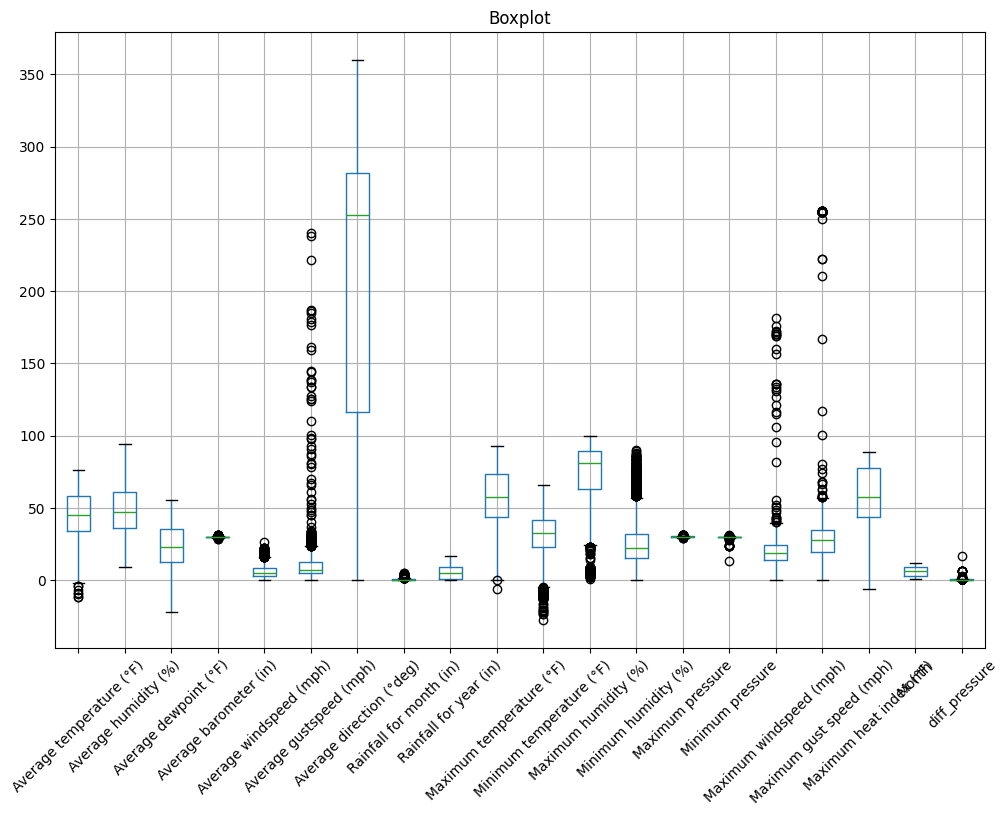

In [10]:
# Visualize outliers

wf.boxplot(column=numeric_columns, figsize=(12, 8))
plt.xticks(rotation=45)
plt.title("Boxplot")
plt.show()

In [11]:
# Remove outliers
remove_outliers = wf[~outliers.any(axis=1)]

remove_outliers.head()

Date  Average temperature (°F)  Average humidity (%)  \
87  2009-04-01                      24.8                  67.0   
88  2009-04-02                      29.1                  49.0   
89  2009-04-03                      36.5                  60.0   
90  2009-04-04                      25.7                  67.0   
91  2009-04-05                      22.0                  55.0   

    Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
87                   14.1                    29.7                      5.9   
88                   11.7                    29.9                     11.0   
89                   22.8                    29.4                      6.1   
90                   15.4                    29.8                      8.5   
91                    7.7                    30.5                      3.9   

    Average gustspeed (mph)  Average direction (°deg)  \
87                      8.3                     263.0   
88                     15.2                     274.0   
89                      8.2                     310.0   
90                     11.6                      10.0   
91                      5.9                     309.0   

    Rainfall for month (in)  Rainfall for year (in)  ...  \
87                     0.00                    0.64  ...   
88                     0.01                    0.65  ...   
89                     0.01                    0.65  ...   
90                     0.24                    0.88  ...   
91                     0.25                    0.89  ...   

    Minimum temperature (°F)  Maximum humidity (%)  Minimum humidity (%)  \
87                      10.2                  87.0                  27.0   
88                      10.9                  82.0                  32.0   
89                      28.7                  93.0                  30.0   
90                      18.6                  93.0                  40.0   
91                       9.5                  78.0                  29.0   

    Maximum pressure  Minimum pressure  Maximum windspeed (mph)  \
87            30.066            29.510                     18.4   
88            30.049            29.616                     27.6   
89            29.616            29.350                     24.2   
90            30.302            29.377                     27.6   
91            30.651            30.270                     17.3   

    Maximum gust speed (mph)  Maximum heat index (°F)  Month  diff_pressure  
87                      26.0                     34.0      4          0.556  
88                      44.0                     43.4      4          0.433  
89                      35.0                     46.1      4          0.266  
90                      41.0                     33.7      4          0.925  
91                      24.0                     33.9      4          0.381  

[5 rows x 21 columns]

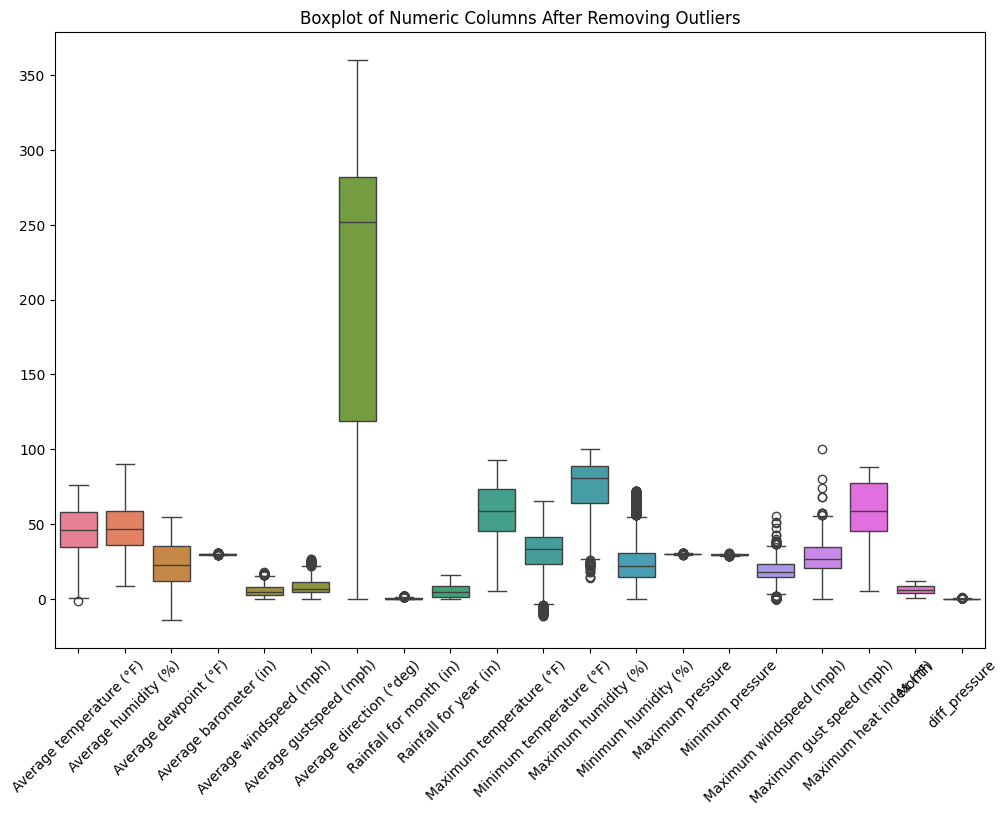

In [12]:
# Plot a boxplot for each numeric column in the DataFrame after removing outliers

plt.figure(figsize=(12,8)) 
sns.boxplot(data=remove_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns After Removing Outliers")
plt.show()


In [13]:
# skewness

numeric_columns = wf.select_dtypes(include=['float64']).columns
skewness = wf[numeric_columns].skew()

print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Average temperature (°F)    -0.388647
Average humidity (%)         0.268336
Average dewpoint (°F)       -0.059631
Average barometer (in)       0.272063
Average windspeed (mph)      1.133216
Average gustspeed (mph)      9.107656
Average direction (°deg)    -0.799367
Rainfall for month (in)      2.471593
Rainfall for year (in)       0.432857
Maximum temperature (°F)    -0.207237
Minimum temperature (°F)    -0.671165
Maximum humidity (%)        -1.342361
Minimum humidity (%)         1.473021
Maximum pressure             0.552152
Minimum pressure           -17.020858
Maximum windspeed (mph)      7.193801
Maximum gust speed (mph)     5.107493
Maximum heat index (°F)     -0.259714
diff_pressure               22.756319
dtype: float64


In [14]:

highly_skewed_columns = ['Average windspeed (mph)', 'Average gustspeed (mph)','Average direction (°deg)', 
                         'Rainfall for month (in)','Maximum temperature (°F)','Maximum humidity (%)',
                         'Minimum humidity (%)','Minimum pressure', 'Maximum windspeed (mph)', 'Maximum gust speed (mph)', 
                         'diff_pressure']

# highly skewed columns and stored in new columns
for column in highly_skewed_columns:
    wf[f'{column}_log'] = np.log(wf[column] + 1) 

wf.head()

Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                     36.8                     274.0                      0.0   
1                     18.0                     240.0                      0.0   
2                     12.2                     290.0                      0.0   
3                      4.5                      47.0                      0.0   
4                     23.1                     265.0                      0.0   

   Rainfall for year (in)  ...  Average gustspeed (mph)_log  \
0                     0.0  ...                     3.632309   
1                     0.0  ...                     2.944439   
2                     0.0  ...                     2.580217   
3                     0.0  ...                     1.704748   
4                     0.0  ...                     3.182212   

   Average direction (°deg)_log  Rainfall for month (in)_log  \
0                      5.616771                          0.0   
1                      5.484797                          0.0   
2                      5.673323                          0.0   
3                      3.871201                          0.0   
4                      5.583496                          0.0   

   Maximum temperature (°F)_log  Maximum humidity (%)_log  \
0                      3.713572                  1.609438   
1                      3.970292                  1.609438   
2                      3.737670                  2.197225   
3                      2.995732                  2.079442   
4                      3.433987                  1.791759   

   Minimum humidity (%)_log  Minimum pressure_log  \
0                  3.332205              3.420869   
1                  2.833213              3.410091   
2                  3.583519              3.409827   
3                  3.583519              3.441283   
4                  2.639057              3.419954   

   Maximum windspeed (mph)_log  Maximum gust speed (mph)_log  \
0                     3.747148                      4.094345   
1                     3.602777                      3.951244   
2                     3.269569                      3.663562   
3                     2.617396                      3.044522   
4                     3.663562                      3.988984   

   diff_pressure_log  
0           0.153579  
1           0.337186  
2           0.679048  
3           0.291923  
4           0.509825  

[5 rows x 32 columns]

In [15]:
# Calculate skewness of transformed columns

transformed_columns = [f'{column}_log' for column in highly_skewed_columns]
skewness_after_transform = wf[transformed_columns].skew()

print("Skewness of transformed columns:")
print(skewness_after_transform)


Skewness of transformed columns:
Average windspeed (mph)_log     -0.181050
Average gustspeed (mph)_log      0.256759
Average direction (°deg)_log    -2.554698
Rainfall for month (in)_log      1.320261
Maximum temperature (°F)_log    -1.806755
Maximum humidity (%)_log        -3.495188
Minimum humidity (%)_log        -0.141506
Minimum pressure_log           -24.684628
Maximum windspeed (mph)_log     -2.202461
Maximum gust speed (mph)_log    -0.801232
diff_pressure_log                5.699462
dtype: float64


# EXPLORATORY DATA ANALYSIS (EDA):

In [16]:
wf.describe()

Average temperature (°F)  Average humidity (%)  Average dewpoint (°F)  \
count               3902.000000           3902.000000            3902.000000   
mean                  44.670733             48.878011              23.127037   
std                   15.326793             17.438153              14.634088   
min                  -12.100000              9.000000             -22.200000   
25%                   33.700000             36.000000              12.100000   
50%                   45.100000             47.000000              22.500000   
75%                   58.000000             61.000000              35.400000   
max                   76.300000             94.000000              55.100000   

       Average barometer (in)  Average windspeed (mph)  \
count             3902.000000              3902.000000   
mean                29.881420                 5.758893   
std                  0.250395                 4.022485   
min                 28.200000                 0.000000   
25%                 29.700000                 2.700000   
50%                 29.900000                 4.600000   
75%                 30.000000                 8.000000   
max                 31.000000                26.400000   

       Average gustspeed (mph)  Average direction (°deg)  \
count              3902.000000               3902.000000   
mean                 10.011968                216.037417   
std                  14.117446                 97.677761   
min                   0.000000                  0.000000   
25%                   4.500000                116.000000   
50%                   7.100000                253.000000   
75%                  12.100000                282.000000   
max                 240.400000                360.000000   

       Rainfall for month (in)  Rainfall for year (in)  \
count              3902.000000             3902.000000   
mean                  0.451105                5.486171   
std                   0.603462                4.534444   
min                   0.000000                0.000000   
25%                   0.050000                0.980000   
50%                   0.220000                5.080000   
75%                   0.670000                9.047500   
max                   4.480000               16.410000   

       Maximum temperature (°F)  ...  Average gustspeed (mph)_log  \
count               3902.000000  ...                  3902.000000   
mean                  57.561661  ...                     2.134840   
std                   17.755874  ...                     0.667881   
min                   -6.100000  ...                     0.000000   
25%                   43.900000  ...                     1.704748   
50%                   57.250000  ...                     2.091864   
75%                   73.200000  ...                     2.572612   
max                   92.700000  ...                     5.486455   

       Average direction (°deg)_log  Rainfall for month (in)_log  \
count                   3902.000000                  3902.000000   
mean                       5.151909                     0.310777   
std                        0.896792                     0.326432   
min                        0.000000                     0.000000   
25%                        4.762174                     0.048790   
50%                        5.537334                     0.198851   
75%                        5.645447                     0.512824   
max                        5.888878                     1.701105   

       Maximum temperature (°F)_log  Maximum humidity (%)_log  \
count                   3901.000000               3902.000000   
mean                       4.014124                  4.243355   
std                        0.364043                  0.462511   
min                       -0.223144                  0.693147   
25%                        3.804438                  4.158883   
50%                        4.065602                  4.406719   
75%      

##  Visualizations:

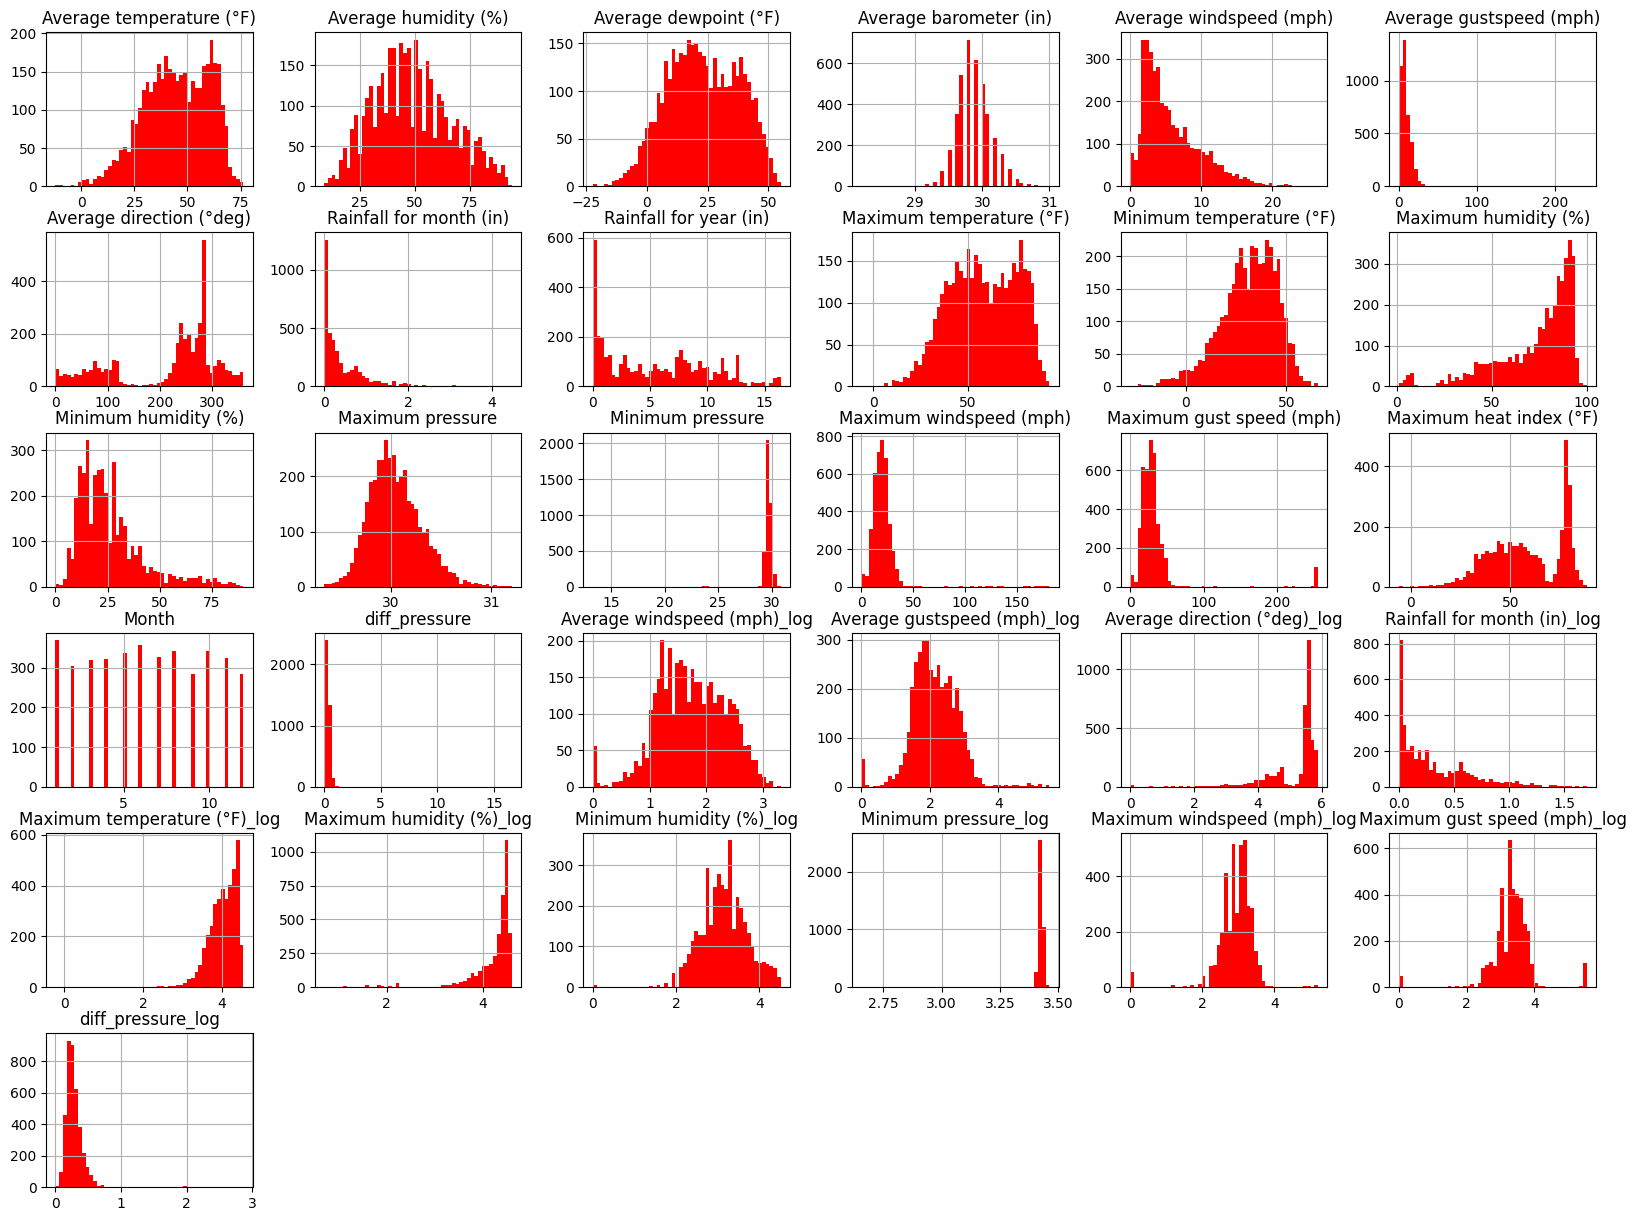

In [17]:
#Histogram

wf.hist(bins=50,color = 'red', figsize=(20,15))
plt.show()

In [18]:
# Selecting numeric columns
numeric_columns = wf.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the numeric columns
correlation_matrix = wf[numeric_columns].corr()

print(correlation_matrix)

                              Average temperature (°F)  Average humidity (%)  \
Average temperature (°F)                      1.000000             -0.258103   
Average humidity (%)                         -0.258103              1.000000   
Average dewpoint (°F)                         0.764830              0.404557   
Average barometer (in)                       -0.550897              0.178934   
Average windspeed (mph)                      -0.167162             -0.516141   
Average gustspeed (mph)                       0.000737             -0.197759   
Average direction (°deg)                      0.034183             -0.315470   
Rainfall for month (in)                       0.299229              0.227414   
Rainfall for year (in)                        0.203111              0.006378   
Maximum temperature (°F)                      0.963821             -0.230784   
Minimum temperature (°F)                      0.919248             -0.170000   
Maximum humidity (%)                    

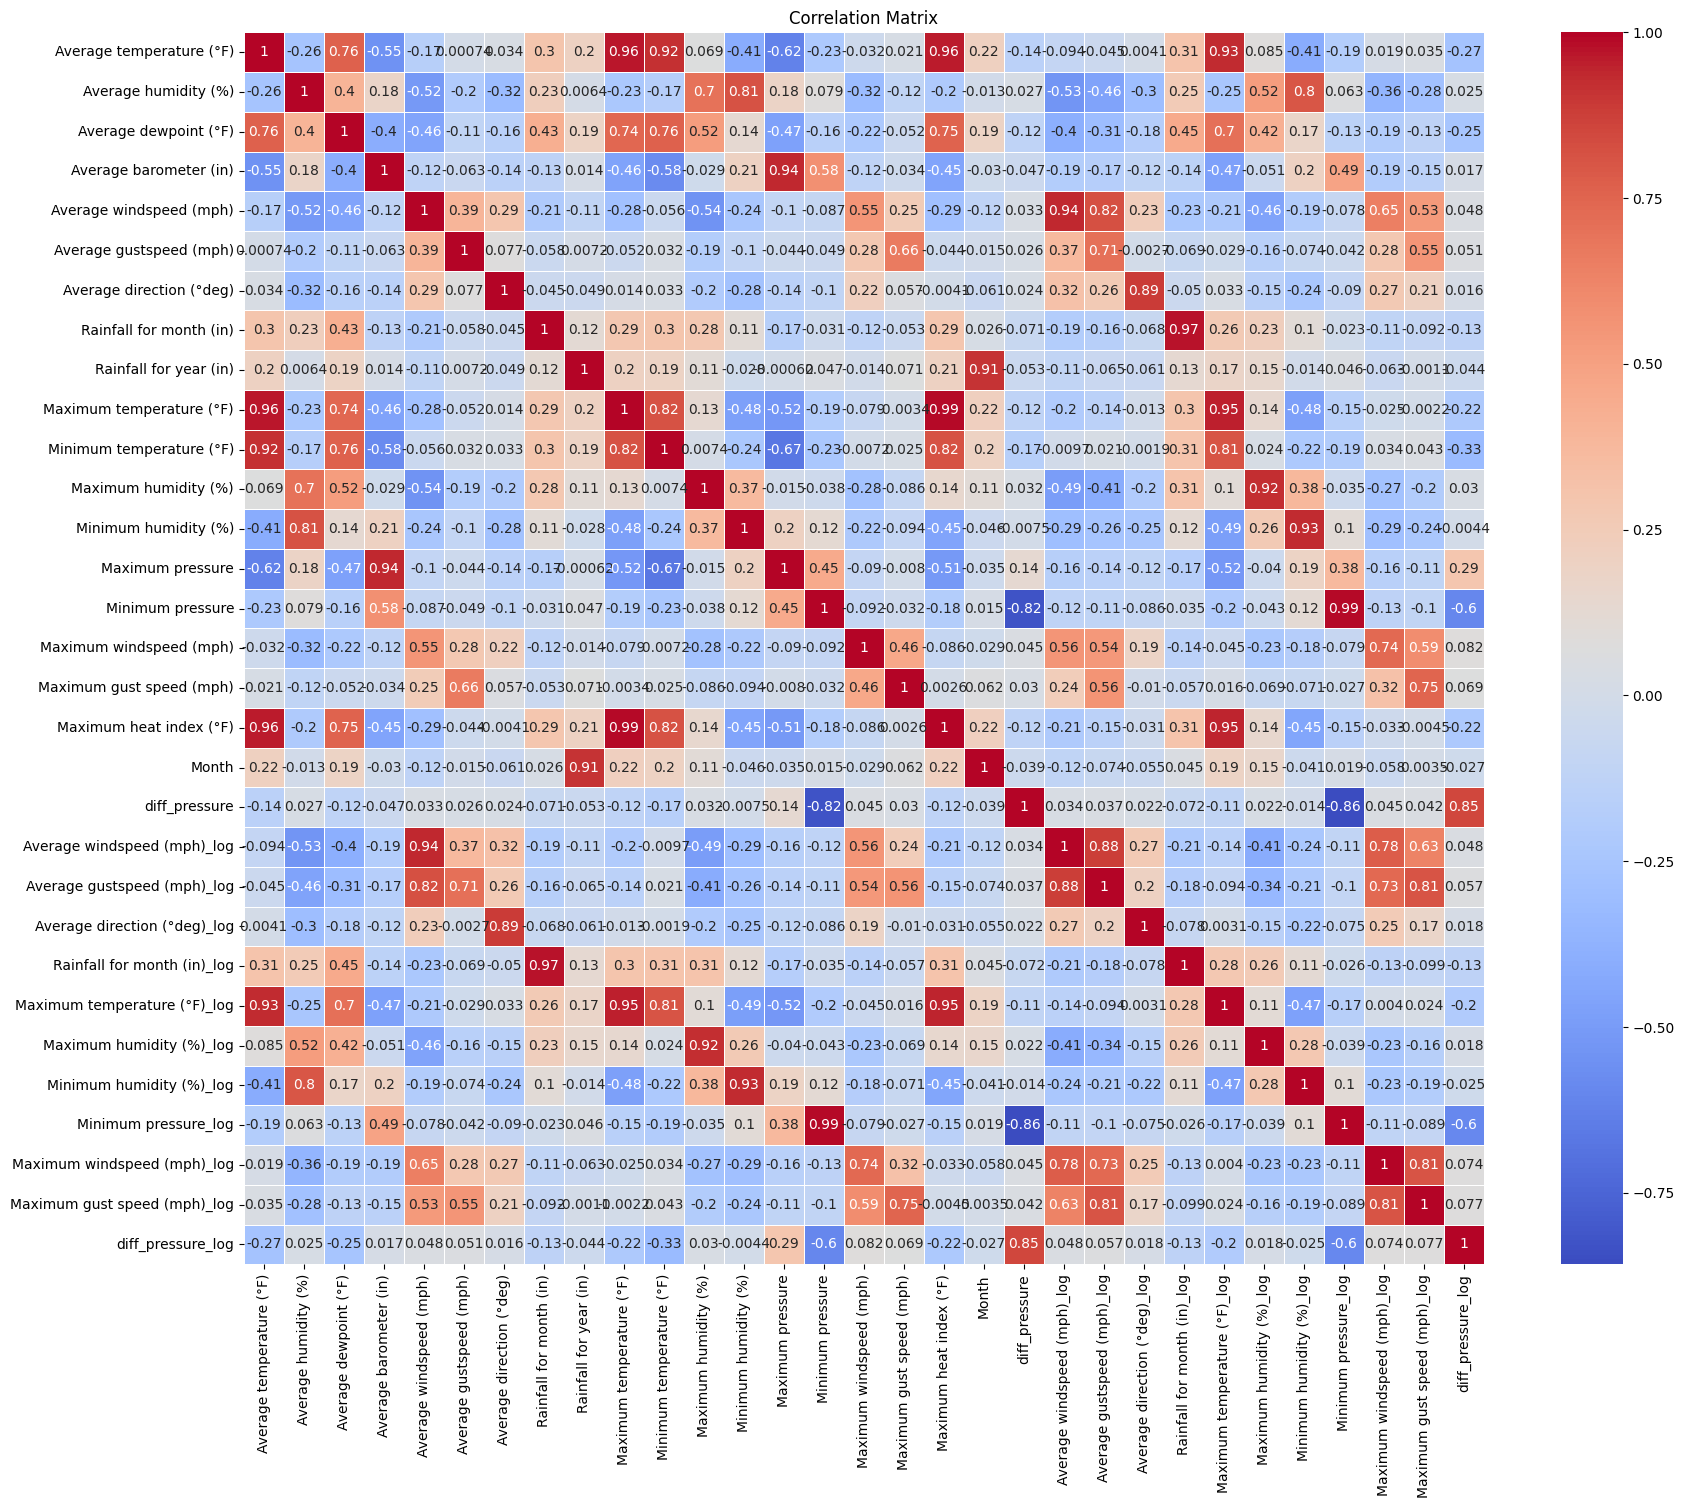

In [19]:
# Heat Map

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

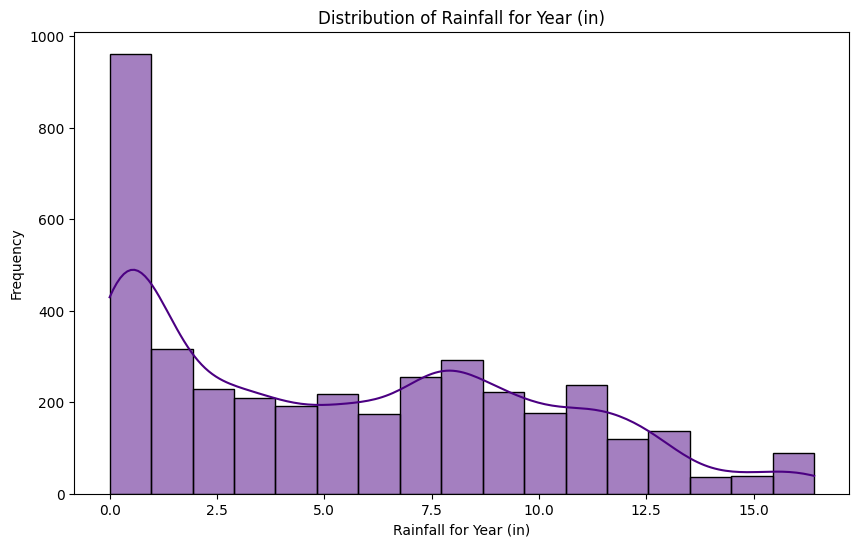

In [20]:
#count plot

plt.figure(figsize=(10, 6))
sns.histplot(wf["Rainfall for year (in)"], kde=True, color="indigo")
plt.title("Distribution of Rainfall for Year (in)")
plt.xlabel("Rainfall for Year (in)")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Aggregate the mean of Average temperature by Month

aggregated_data = wf.groupby('Month')['Average temperature (°F)'].mean().reset_index()

print(aggregated_data)

    Month  Average temperature (°F)
0       1                 29.627913
1       2                 28.500660
2       3                 36.138679
3       4                 40.244860
4       5                 48.013353
5       6                 59.969748
6       7                 63.781595
7       8                 61.612903
8       9                 56.098587
9      10                 44.297361
10     11                 36.379257
11     12                 28.981625


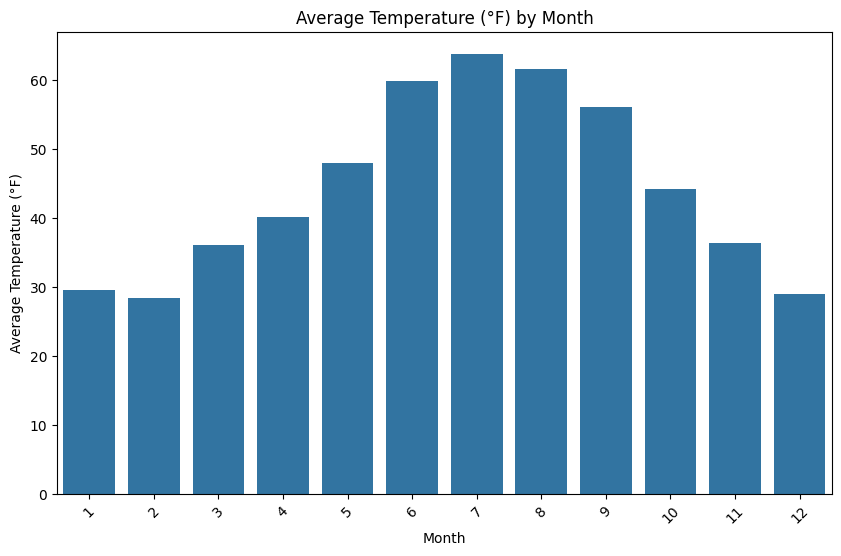

In [22]:
# Create a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_data, x='Month', y='Average temperature (°F)')
plt.title('Average Temperature (°F) by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=45)  
plt.show()

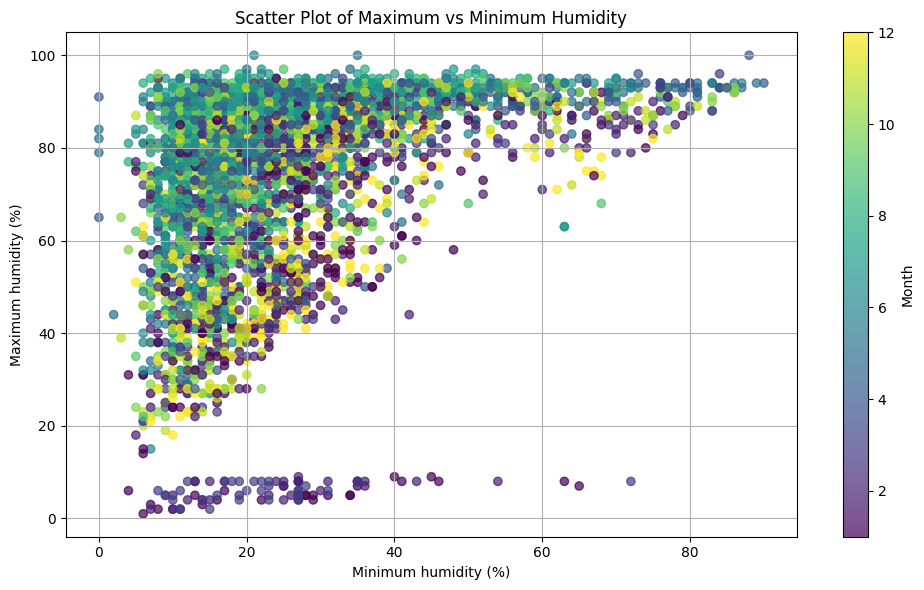

In [23]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(wf['Minimum humidity (%)'], wf['Maximum humidity (%)'], c=wf['Month'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Month')
plt.title('Scatter Plot of Maximum vs Minimum Humidity')
plt.xlabel('Minimum humidity (%)')
plt.ylabel('Maximum humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights: This plot helps in visually identifying any relationship or pattern between Maximum humidity (%) and Minimum humidity (%) across different months.

### Comparison: By using color to represent months, it allows for quick comparison and identification of any seasonal trends or anomalies.

### Analysis: You can use this plot to analyze how humidity varies within each month and across different months, which is crucial for understanding weather patterns and trends.

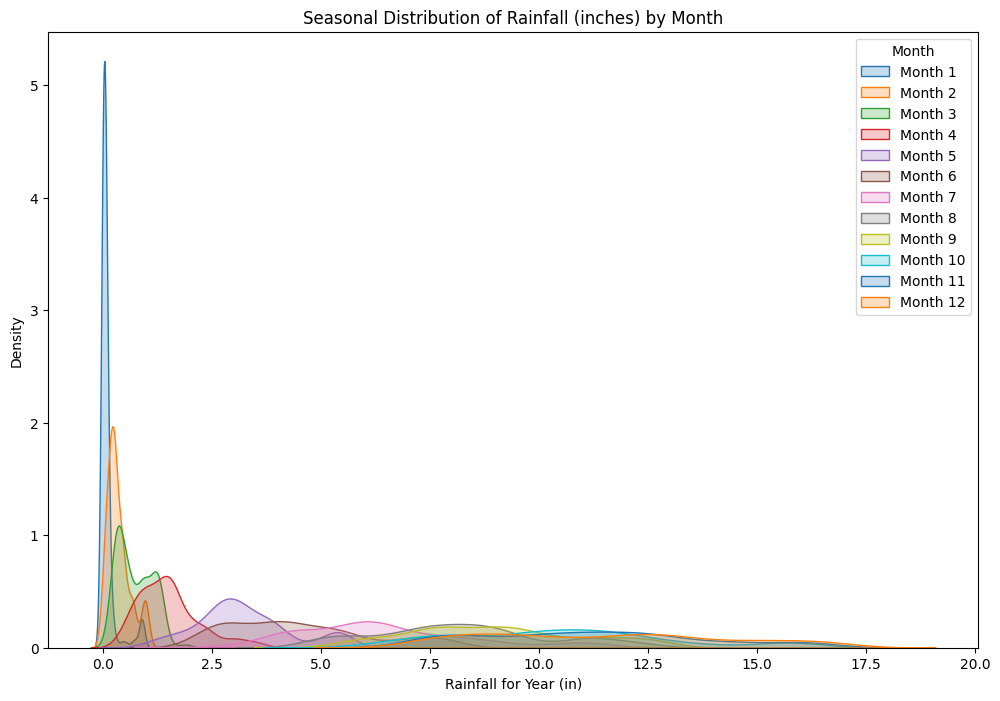

In [24]:
# KDE Plot

plt.figure(figsize=(12, 8))
for month in wf['Month'].unique():
    subset = wf[wf['Month'] == month]
    sns.kdeplot(subset['Rainfall for year (in)'], shade=True, label=f'Month {month}')
    
plt.title('Seasonal Distribution of Rainfall (inches) by Month')
plt.xlabel('Rainfall for Year (in)')
plt.ylabel('Density')
plt.legend(title='Month')
plt.show()


## X-axis Label: "Rainfall for Year"

### This label indicates the variable being plotted along the x-axis, which is the amount of rainfall measured in inches for a year.


## Y-axis Label: "Density"

### This label indicates the y-axis represents the density of the data points in the distribution.

### KDE helps in understanding the seasonal variability of rainfall and provides insights into how rainfall is distributed across different months of the year.

# FEATURE SELECTION WITH RANDOM FOREST

In [25]:
if 'Date' in wf.columns:
    wf['Date'] = pd.to_datetime(wf['Date']).astype('int64') // 10**9 


X = wf.drop('Rainfall for year (in)', axis=1) 
y = wf['Rainfall for year (in)']               

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and Train Random Forest Regressor Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluate the Model
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.06553052071702944
R-squared (Random Forest): 0.9967141745395087


# FEATURE SCALING

In [26]:
# Scale the features using StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

pd.DataFrame(X_train_scaled, columns=X.columns).head()

Date  Average temperature (°F)  Average humidity (%)  \
0 -1.575696                  1.577310             -1.481431   
1 -0.222879                 -0.747944             -0.267689   
2 -0.094899                  1.087439             -0.267689   
3  0.524492                  1.466273             -1.943809   
4  0.705798                 -0.388705              1.061646   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0               0.399800               -0.713534                -0.073387   
1              -0.703523                0.478405                -0.098438   
2               0.927476               -0.316221                -0.799863   
3              -0.497935               -1.110847                -0.373997   
4               0.351829                0.478405                -0.849964   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                12.428616                  1.364753                -0.663273   
1                -0.110889                  0.534886                -0.099383   
2                -0.407098                  0.057713                -0.115968   
3                -0.371835                 -1.062607                -0.630103   
4                -0.414150                  0.597127                -0.232063   

   Maximum temperature (°F)  ...  Average gustspeed (mph)_log  \
0                  1.208531  ...                     4.650970   
1                 -0.934500  ...                     0.164644   
2                  1.253647  ...                    -0.713512   
3                  1.372078  ...                    -0.577857   
4                 -0.393103  ...                    -0.742175   

   Average direction (°deg)_log  Rainfall for month (in)_log  \
0                      0.792220                    -0.800291   
1                      0.493578                     0.059257   
2                      0.278638                     0.037133   
3                     -0.478644                    -0.742474   
4                      0.518871                    -0.122378   

   Maximum temperature (°F)_log  Maximum humidity (%)_log  \
0                      1.014265                 -1.949073   
1                     -0.764280                  0.302273   
2                      1.041744                  0.217473   
3                      1.112603                 -1.127339   
4                     -0.196315                  0.612358   

   Minimum humidity (%)_log  Minimum pressure_log  \
0                 -0.557247             -0.442500   
1                  0.071268              0.044223   
2                 -0.911120             -0.045385   
3                 -1.350668             -0.564870   
4                 -5.721133              0.249233   

   Maximum windspeed (mph)_log  Maximum gust speed (mph)_log  \
0                     0.181516                      3.491034   
1                     0.066152                      0.039216   
2                    -0.046048                      0.161034   
3                     0.568931                     -0.160107   
4                     0.066152                      0.617922   

   diff_pressure_log  
0           1.093351  
1           1.483089  
2          -0.707474  
3           0.568869  
4           0.154703  

[5 rows x 31 columns]

# SPLIT DATA INTO TRAINING AND TESTING SETS

In [27]:
# Print the shapes of the training and testing sets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3121, 31)
X_test shape: (781, 31)
y_train shape: (3121,)
y_test shape: (781,)


# BUILD THE ML MODEL

### Regression:

In [28]:
#LinearRegression

# Instantiate Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Linear Regression): {mse}')
print(f'R-squared (Linear Regression): {r2}')


Mean Squared Error (Linear Regression): 2.875208082153523
R-squared (Linear Regression): 0.8558315756203776


In [29]:
#SVR

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()),  
    ('svr', SVR(kernel='linear', C=1.0)) 
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_svr = pipeline.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R-squared (SVR): {r2_svr}')

Mean Squared Error (SVR): 2.9109650419784345
R-squared (SVR): 0.8540386533652684


In [30]:
# Instantiate and train AdaBoost Regressor model

ada_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_regressor.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_ada = ada_regressor.predict(X_test_scaled)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f'Mean Squared Error (AdaBoost): {mse_ada}')
print(f'R-squared (AdaBoost): {r2_ada}')

Mean Squared Error (AdaBoost): 1.6709487146007795
R-squared (AdaBoost): 0.9162154402325143


In [31]:
#MLP Regressor model

# Instantiate MLP Regressor model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'Mean Squared Error (MLP Regressor): {mse_mlp}')
print(f'R-squared (MLP Regressor): {r2_mlp}')

Mean Squared Error (MLP Regressor): 1.5320986597571147
R-squared (MLP Regressor): 0.9231776471614966


# MODEL EVALUATION

### Regression Metrics:

In [32]:
# Root Mean Squared Error (RMSE)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print(f'Mean Squared Error (MLP Regressor): {mse_mlp}')
print(f'Root Mean Squared Error (MLP Regressor): {rmse_mlp}')
print(f'R-squared (MLP Regressor): {r2_mlp}')
print(f'Mean Absolute Error (MLP Regressor): {mae_mlp}')

Mean Squared Error (MLP Regressor): 1.5320986597571147
Root Mean Squared Error (MLP Regressor): 1.237779729902342
R-squared (MLP Regressor): 0.9231776471614966
Mean Absolute Error (MLP Regressor): 0.8989467347121082


## HYPERPARAMETER TUNING

In [33]:
# hyperparameters grid for MLP Regressor
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# GridSearchCV
grid_search = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

# Calculate and print evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Mean Absolute Error (MAE): 0.5372496634579594
Mean Squared Error (MSE): 0.7267049005877468
Root Mean Squared Error (RMSE): 0.8524698825106649
R-squared (R2): 0.9635616284063118


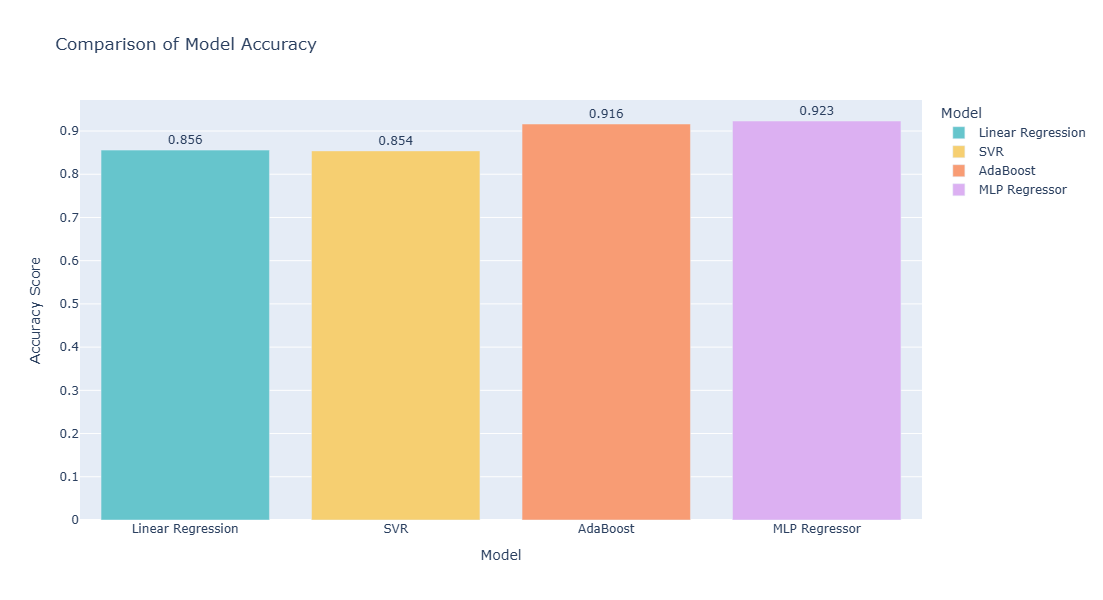

In [34]:
model_performance = {
    'Model': ['Linear Regression', 'SVR', 'AdaBoost', 'MLP Regressor'],
    'Accuracy Score': [0.8558315756203776, 0.8540386533652684, 0.9162154402325143, 0.9231776471614966]
}

performance_wf = pd.DataFrame(model_performance)

colors = px.colors.qualitative.Pastel

# Create the bar plot
fig = px.bar(performance_wf, x='Model', y='Accuracy Score', text='Accuracy Score',
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(performance_wf['Model'], colors)})


fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.update_layout(width=800, height=600)

fig.show()

# TEST WITH UNSEEN DATA

In [35]:
# Calculate metrics
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")
print(f"R-squared (R2) on Test Set: {r2_test}")



Mean Absolute Error (MAE) on Test Set: 0.5372496634579594
Mean Squared Error (MSE) on Test Set: 0.7267049005877468
Root Mean Squared Error (RMSE) on Test Set: 0.8524698825106649
R-squared (R2) on Test Set: 0.9635616284063118


# INTERPRETATION OF RESULTS

### The analysis demonstrates the effectiveness of machine learning models in predicting rainfall based on climate data. Among the models tested, the MLP Regressor performed the best, achieving the lowest mean squared error (MSE) and highest R-squared value. Despite data limitations such as missing values and outliers, preprocessing techniques improved model accuracy.